<a href="https://colab.research.google.com/github/Kryohi/DLExperiments/blob/master/20190416_cartoonize_real_world_images_using_cartoongan_and_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN-TensorFlow2
Cartoonize your images using CartoonGAN, powered by TensorFlow 2.0. 

- [Blog post](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html)
- [Blog post (Traditional Chinese)](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2.html)
- [Github repo](https://github.com/mnicnc404/CartoonGan-tensorflow)

<img src="https://github.com/mnicnc404/CartoonGan-tensorflow/blob/master/images/cover.gif?raw=true" height="300px">

## Clone github  repo
This repo contain the Python script that we will use to generate cartoon-style images.

In [0]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/mnicnc404/{repo}.git
os.chdir(os.path.join(repo))

Cloning into 'CartoonGan-tensorflow'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1461 (delta 10), reused 8 (delta 4), pack-reused 1442
Receiving objects: 100% (1461/1461), 339.01 MiB | 35.81 MiB/s, done.
Resolving deltas: 100% (615/615), done.
Checking out files: 100% (407/407), done.


In [0]:
!ls | grep cartoonize.py

cartoonize.py


## Install packages
We will need TensorFlow 2.0 and [keras-contrib](https://github.com/keras-team/keras-contrib) packages.

In [0]:
from IPython.display import clear_output, display, Image

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
clear_output()

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

## Download new images to cartoonize
Get url of the image that you wish to transform, and paste it in the form below. You can also keep the default url and see how it work. 

Supported format of the images:
- `.jpg`
- `.png`
- `.gif`

Url of sample images
- Harry Potter: https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
- Iron man: https://media.giphy.com/media/rlsHtd2YC8k0g/giphy.gif

In [0]:
image_url = 'https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif'  #@param {type: "string"}

Download the image from the web and save it for transformation. You don't need to know all the detail here now.

In [0]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")

import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}

--2019-05-06 13:17:30--  https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
Resolving media.giphy.com (media.giphy.com)... 151.101.58.2
Connecting to media.giphy.com (media.giphy.com)|151.101.58.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1898771 (1.8M) [image/gif]
Saving to: ‘giphy.gif’

giphy.gif           100%[===================>]   1.81M  --.-KB/s    in 0.09s   

2019-05-06 13:17:30 (21.2 MB/s) - ‘giphy.gif’ saved [1898771/1898771]



## The image that we're going to cartoonize

If you pasted the correct image url in the previous cell, this part will just show you the downloaded image.

In [0]:
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

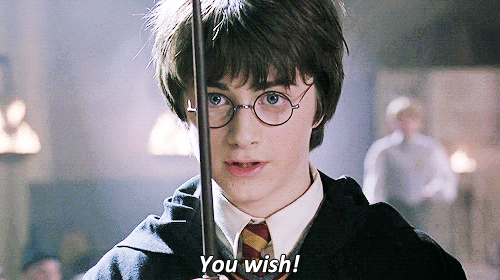

In [0]:
display(Image(png_path))

## Cartoonize images using Python script
Transform the downloaded image using selected style.

In [0]:
styles = "shinkai" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [0]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal

[2019-05-06 13:17:38] [Cartoonizer] [INFO] Transformed images will be saved to `output_images` folder.
[2019-05-06 13:17:40] [Cartoonizer] [INFO] Cartoonizing images using shinkai style...
[2019-05-06 13:17:40] [Cartoonizer] [INFO] Preparing to transform 2 images from `input_images` directory...
Transforming: 100% 2/2 [00:16<00:00,  6.66s/it, File=giphy_1557148648.gif]
[2019-05-06 13:17:57] [Cartoonizer] [INFO] Total processing time: 0:00:18.684109


## Compare input with the caroonized result

In [0]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)

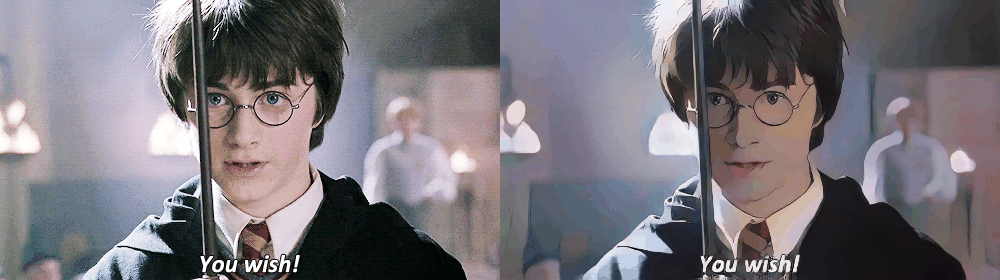

In [0]:
display(Image(result_path))

## Download the result


To download only the tranformed image , set `include_original_image` to `no`.

In [0]:
include_original_image = "no"  #@param {type: "string"}

In [0]:
from google.colab import files
if include_original_image == "yes":
    output_image_path = os.path.join(output_image_dir, "comparison", new_img_filename)
else:
    output_image_path = os.path.join(output_image_dir, styles, new_img_filename)
files.download(output_image_path)

## Check all transformed_images

In [0]:
!apt-get install tree
clear_output()

In [0]:
!tree {output_image_dir}

output_images
├── comparison
│   ├── giphy_1557148648.gif
│   ├── giphy_1557148648.gif.png
│   └── temple.jpg
└── shinkai
    ├── giphy_1557148648.gif
    └── temple.jpg

2 directories, 5 files


## What you can do now
- try cartoonizing more new images
- view our [blog post](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html) to know more details
- share what you created with me and I can't wait to check them all!
    - [Twitter](https://twitter.com/leemengtw)
    - [Facebook](https://www.facebook.com/LeeMengTaiwan) 